# RCNN and YOLO

**1.What is the main purpose of RCNN in object detection?**

ans:

The main purpose of **RCNN (Region-based Convolutional Neural Network)** in object detection is to accurately **detect and localize objects** within an image by identifying bounding boxes around them and classifying the objects within these regions.

### Key Steps in RCNN:
1. **Region Proposal**: Generate a set of candidate regions (bounding boxes) in the image that are likely to contain objects using selective search.
2. **Feature Extraction**: Use a convolutional neural network to extract features from each proposed region.
3. **Classification and Regression**:
   - Classify the object in each region using a classifier (e.g., SVM or softmax).
   - Refine the bounding box coordinates with a regression model for more precise localization.

### Advantages of RCNN:
- It combines the power of **deep learning** (feature extraction) with traditional object detection methods (region proposals).
- It provides high accuracy for object detection by using CNNs for feature extraction.

### Limitations:
- **Slow**: Processing each region proposal independently through a CNN is computationally expensive.
- High memory and time requirements.

RCNN paved the way for more efficient models like **Fast RCNN**, **Faster RCNN**, and **YOLO**, which address these limitations.

**2.What is the difference between Fast RCNN and Faster RCNN?**

Ans:

The key difference between **Fast RCNN** and **Faster RCNN** lies in how they generate region proposals, which directly impacts their speed and efficiency. Here's a detailed comparison:

### **1. Region Proposal Method**
- **Fast RCNN**:
  - Uses **Selective Search** to generate region proposals.
  - Selective Search is a slow, external algorithm that processes the image to produce ~2000 candidate regions.
  - This step makes Fast RCNN computationally expensive and limits real-time performance.

- **Faster RCNN**:
  - Introduces the **Region Proposal Network (RPN)**, a neural network that generates region proposals.
  - The RPN shares convolutional layers with the main detection network, making it much faster and more efficient.
  - The RPN generates region proposals dynamically during training and inference, eliminating the need for an external algorithm.

---

### **2. Speed**
- **Fast RCNN**:
  - Slower due to the reliance on Selective Search.
  - Region proposals are pre-computed, making the process less integrated and time-consuming.

- **Faster RCNN**:
  - Significantly faster because the RPN is integrated into the model and operates in a single, unified pipeline.

---

### **3. Architecture**
- **Fast RCNN**:
  - Processes region proposals from Selective Search.
  - Each proposal is cropped using **RoI Pooling**, passed through fully connected layers, and classified.

- **Faster RCNN**:
  - Combines the **Region Proposal Network (RPN)** with Fast RCNN's detection network.
  - Region proposals are generated directly from shared feature maps, and the process is more streamlined.

---

### **4. Real-time Suitability**
- **Fast RCNN**:
  - Not suitable for real-time applications due to the slow Selective Search step.
  
- **Faster RCNN**:
  - More suitable for real-time applications, though it is still slower compared to one-stage detectors like YOLO or SSD.

---

### Summary Table:

| **Aspect**              | **Fast RCNN**                       | **Faster RCNN**                     |
|--------------------------|--------------------------------------|--------------------------------------|
| **Region Proposal**      | Selective Search (external)         | Region Proposal Network (RPN)       |
| **Speed**                | Slower                              | Faster                              |
| **Architecture**         | Two separate stages                | Unified with shared feature maps    |
| **Real-time Use**        | Less suitable                      | More suitable (but slower than YOLO)|


**3.How does YOLO handle object detection in real-time?**

Ans:

**YOLO (You Only Look Once)** handles object detection in real-time by treating the task as a **single regression problem**, which allows it to predict bounding boxes and class probabilities in one pass through the network. Here's how YOLO achieves real-time performance:

---

### 1. **Single Neural Network Architecture**
YOLO uses a single convolutional neural network (CNN) that processes the entire image at once. Unlike traditional methods (e.g., RCNN variants), which involve multiple stages like region proposal generation and classification, YOLO performs:
   - **Object Localization**: Predicts bounding boxes.
   - **Classification**: Predicts the class of each object.
   - **Confidence Scores**: Estimates the likelihood of a bounding box containing an object.

This unified approach minimizes computational overhead.

---

### 2. **Grid-based Prediction**
- The input image is divided into a **grid of \( S \times S \)** cells.
- Each grid cell predicts:
  - **Bounding Boxes**: Coordinates of the box (center \(x, y\), width \(w\), height \(h\)).
  - **Confidence Score**: Probability of the box containing an object.
  - **Class Probabilities**: Probabilities for each object class.

This avoids the need for explicit region proposals, speeding up the detection process.

---

### 3. **End-to-End Training**
- YOLO optimizes the entire detection pipeline in a single training process, combining localization loss and classification loss.
- This end-to-end training ensures that the network learns globally optimized features for object detection.

---

### 4. **Efficient Feature Sharing**
- YOLO processes the image through a series of convolutional layers, extracting features for the entire image in one forward pass.
- This shared computation is faster than re-evaluating features for each region, as done in region-based methods (e.g., RCNN).

---

### 5. **Real-time Performance**
- YOLO achieves high speeds (e.g., 45 FPS in its original version, faster in newer versions like YOLOv4 and YOLOv5) because:
  - It eliminates the computationally expensive region proposal step.
  - It uses a lightweight CNN architecture optimized for speed.

---

### 6. **Post-processing with Non-Max Suppression (NMS)**
To ensure accurate detection, YOLO applies **Non-Max Suppression**:
- Keeps the bounding box with the highest confidence score for overlapping detections.
- Removes duplicate boxes for the same object, reducing false positives.

---

### 7. **Scalability in Newer Versions**
Modern versions of YOLO (e.g., YOLOv4, YOLOv5, YOLOv8) improve performance by incorporating:
- **Efficient backbone networks** (e.g., CSPDarknet).
- Advanced techniques like **anchor-free detection**, **attention mechanisms**, and **improved loss functions**.
- Enhanced scalability for real-time applications on edge devices.


**4.Explain the concept of Region Proposal Networks (RPN) in Faster RCNNF?**

Ans:

The **Region Proposal Network (RPN)** is a key component of **Faster RCNN**, responsible for generating candidate regions (region proposals) that likely contain objects. Unlike traditional methods like **Selective Search**, the RPN is integrated into the neural network and works as a fully convolutional layer that shares feature maps with the main object detection network, enabling faster and more efficient region proposal generation.

---

### **Concepts of RPN**
1. **Shared Convolutional Features**:
   - The RPN uses the feature maps extracted by the backbone CNN (e.g., ResNet or VGG) from the input image.
   - This sharing eliminates redundant computations and makes the process efficient.

2. **Sliding Window Mechanism**:
   - A small sliding window moves across the shared feature map, generating region proposals for each location.
   - The window predicts **bounding box coordinates** and **objectness scores** for predefined anchors (possible regions of interest).

3. **Anchors**:
   - Anchors are predefined bounding boxes of different sizes and aspect ratios centered at each sliding window location.
   - For example, an RPN may use 9 anchors (e.g., combinations of 3 scales and 3 aspect ratios) at each position.
   - These anchors help detect objects of various sizes and shapes.

4. **Outputs of RPN**:
   - **Bounding Box Coordinates**: The predicted coordinates refine the predefined anchors to localize objects more accurately.
   - **Objectness Score**: A score indicating whether the proposed region contains an object or background.

---

### **RPN Architecture**
1. **Input**:
   - The shared feature map from the backbone CNN.
   
2. **Sliding Window**:
   - A 3x3 convolutional layer slides across the feature map.
   - Generates intermediate feature vectors for each spatial location.

3. **Outputs**:
   - **Objectness Score Head**:
     - A classification layer predicts whether each anchor is likely to contain an object (foreground) or not (background).
     - Typically, uses a sigmoid activation.
   - **Bounding Box Regression Head**:
     - A regression layer refines the anchor box coordinates to better fit the object.
     - Outputs offsets for \(x, y, w, h\) relative to the anchor.

---

### **Training the RPN**
The RPN is trained using a combination of:
1. **Classification Loss**:
   - Measures how well the network distinguishes objects (foreground) from background.
   - Typically a binary cross-entropy loss.

2. **Regression Loss**:
   - Measures how accurately the bounding box coordinates match the ground truth.
   - Often uses smooth \(L_1\) loss for better stability.

3. **Anchor Sampling**:
   - To balance the number of positive and negative samples, a subset of anchors is selected during training:
     - **Positive anchors**: Overlap with ground-truth boxes (e.g., Intersection over Union (IoU) > 0.7).
     - **Negative anchors**: Minimal overlap (e.g., IoU < 0.3).

---

### **Advantages of RPN**
1. **Efficiency**:
   - RPN integrates region proposal generation into the detection pipeline, eliminating the need for external algorithms like Selective Search.
   - It shares convolutional computations with the main detection network.

2. **Flexibility**:
   - The use of anchors allows the RPN to detect objects of varying sizes and aspect ratios effectively.

3. **End-to-End Training**:
   - Both the RPN and the object detection network are trained simultaneously, optimizing the entire pipeline for accuracy and speed.

---

### **Role in Faster RCNN**
- The RPN provides a small number of high-quality region proposals (~2000) to the second stage of Faster RCNN.
- These proposals are refined and classified by the Fast RCNN head to produce final object detections.


**5.How does YOLOv9 improve upon its predecessors?**

Ans:

YOLOv9 brings several advancements over its predecessors, focusing on efficiency, accuracy, and flexibility in object detection:

1. **Reversible Functions**: YOLOv9 integrates reversible functions into its architecture to address the *information bottleneck problem*. This approach ensures no loss of information during transformations, enabling more accurate gradient computations, especially in deep networks.

2. **Programmable Gradient Information (PGI)**: A new training mechanism is introduced, combining a main inference branch, an auxiliary reversible branch for gradient calculations, and multi-level auxiliary information. This setup improves the precision of gradients during training while maintaining efficient inference.

3. **Generalized Efficient Layer Aggregation Network (GELAN)**: GELAN enhances YOLOv9’s structural efficiency by merging features from CSPNet and ELAN for better gradient flow and faster inference. It supports lightweight architecture while maintaining high accuracy.

4. **Performance Improvements**: YOLOv9 is more computationally efficient than YOLOv7 and YOLOv8, with fewer parameters and reduced computational requirements. Despite these optimizations, it delivers comparable or better accuracy, achieving up to a 0.6% improvement in Average Precision (AP) for certain configurations.


**6.What role does non-max suppression play in YOLO object detection?**

Ans:

Non-Maximum Suppression (NMS) is a crucial post-processing step in YOLO (You Only Look Once) object detection models. Its primary role is to eliminate redundant and overlapping bounding boxes, ensuring that only the most relevant box for each detected object is retained. Here's how it works:

### Steps in Non-Max Suppression:
1. **Confidence Filtering**: YOLO first generates multiple bounding boxes for potential objects in an image, each with a confidence score indicating the probability of containing an object. Boxes below a confidence threshold are discarded.
   
2. **IoU Calculation**: For each remaining box, YOLO calculates the Intersection over Union (IoU) with other overlapping boxes. IoU measures the overlap between two boxes relative to their union.

3. **Suppression of Redundant Boxes**:
   - For boxes with high IoU (indicating significant overlap), the one with the highest confidence score is retained.
   - Other boxes with lower confidence are suppressed, effectively reducing duplicates.

### Role and Benefits:
- **Reduces Redundancy**: Prevents multiple detections of the same object.
- **Improves Accuracy**: Ensures a single, precise bounding box is selected for each object.
- **Enhances Efficiency**: Minimizes computational overhead by reducing the number of boxes passed to subsequent processing stages.

In YOLO models, NMS ensures the output remains clean and interpretable, maintaining the balance between speed and accuracy, which is essential for real-time object detection tasks.

**7.Describe the data preparation process for training YOLOv9 ?**

Ans:

Preparing data for training YOLOv9 involves several steps to ensure the model receives high-quality inputs. These steps include collecting, annotating, organizing, augmenting, and configuring the data properly. Here's a breakdown:

---

### 1. **Data Collection**  
   - Gather diverse images representing all object categories to ensure robust training.
   - Ensure the dataset reflects the variability in object scales, angles, lighting, and backgrounds for better generalization.

---

### 2. **Annotation**  
   - Use annotation tools like **LabelImg**, **Roboflow**, or **CVAT** to draw bounding boxes around objects of interest in each image.
   - Save annotations in YOLO-compatible format (e.g., `.txt` files), where each line represents:
     ```
     class_id x_center y_center width height
     ```
     - `class_id`: Numeric label of the object class.
     - `x_center`, `y_center`, `width`, `height`: Normalized coordinates relative to image dimensions.

---

### 3. **Dataset Organization**  
   - Split the dataset into **training**, **validation**, and optionally **testing** sets. A typical split is 80%-10%-10%.
   - Organize files into directories:
     ```
     dataset/
         images/
             train/
             val/
             test/
         labels/
             train/
             val/
             test/
     ```
     Ensure the filenames of images and annotations match.

---

### 4. **Data Augmentation**  
   - Apply augmentations to increase dataset diversity and improve model generalization:
     - **Geometric Transformations**: Flipping, rotation, scaling.
     - **Photometric Adjustments**: Brightness, contrast, hue, saturation changes.
     - **CutMix/Mosaic**: Combining images to enhance contextual learning.
   - Use tools or libraries like **Albumentations** or integrated frameworks like **Roboflow** for automated augmentation.

---

### 5. **Class Labels Configuration**  
   - Create a `classes.txt` file listing all object classes, one per line:
     ```
     class_1
     class_2
     ...
     ```

---

### 6. **Dataset YAML File**  
   - Write a `.yaml` file defining dataset paths and classes. Example:
     ```yaml
     train: path/to/train/images
     val: path/to/val/images
     nc: 3  # number of classes
     names: ['class_1', 'class_2', 'class_3']
     ```

---

### 7. **Verify Data Integrity**  
   - Check for mismatched filenames or incorrect annotations.
   - Visualize samples using YOLO tools or Python scripts to confirm correctness.

---

### Tools and Best Practices:
- Utilize **Roboflow** for end-to-end data preparation, from annotation to augmentation.
- Use pre-trained weights for YOLOv9 as a starting point to reduce training time and improve accuracy for smaller datasets.


**8. What is the significance of anchor boxes in object detection models like YOLOv9 ?**

Ans:

Anchor boxes play a crucial role in object detection models, including YOLOv9, as they serve as predefined templates that help the model detect objects of varying sizes and aspect ratios more effectively. Here's why they are significant:

---

### 1. **Object Size and Aspect Ratio Handling**  
   - Anchor boxes represent predefined shapes (e.g., rectangular boxes of varying dimensions) that approximate the shapes and sizes of objects in the dataset.
   - This helps the model predict bounding boxes efficiently by adjusting anchor box dimensions rather than starting from scratch.

---

### 2. **Prediction Simplification**  
   - Instead of directly predicting the absolute size and location of bounding boxes, YOLOv9 predicts offsets relative to the anchor boxes.  
   - This simplifies the regression problem and leads to faster and more accurate convergence during training.

---

### 3. **Multi-Scale Detection**  
   - Anchor boxes allow detection of objects at different scales.  
   - YOLOv9 assigns objects to specific anchors based on their Intersection over Union (IoU) overlap, ensuring that large objects are matched with large anchors and small objects with small anchors.

---

### 4. **Improved Detection of Overlapping Objects**  
   - With multiple anchor boxes per grid cell, the model can detect overlapping objects by associating different objects with different anchor boxes in the same region.

---

### 5. **Efficiency in Training and Inference**  
   - Predefined anchor boxes reduce the complexity of label assignment during training and make predictions faster by narrowing down possible bounding box shapes.

---

### YOLOv9 Enhancements with Anchor Boxes:
While earlier YOLO models used anchor boxes, YOLOv9 may integrate advanced mechanisms like anchor-free approaches or learnable anchors, blending the benefits of anchors with newer techniques to optimize detection accuracy and speed.



**9.What is the key difference between YOLO and R-CNN architectures ?**

Ans:

The key difference between YOLO (You Only Look Once) and R-CNN (Region-Based Convolutional Neural Network) lies in their approach to object detection, particularly in how they handle region proposals and perform predictions:

---

### 1. **Region Proposal vs. Unified Detection**  
   - **R-CNN**:
     - Employs a *two-stage* approach.
     - First, generates region proposals using a separate algorithm (e.g., Selective Search).
     - Second, processes these proposals using a CNN for classification and bounding box regression.
     - Results in a slower pipeline because region proposals and CNN processing are decoupled.
   - **YOLO**:
     - Uses a *single-stage* approach.
     - Predicts object classes and bounding boxes directly from the entire image in a single forward pass of the neural network.
     - Prioritizes speed and real-time performance.

---

### 2. **Speed and Real-Time Detection**  
   - **R-CNN**:
     - Relatively slower due to its reliance on external region proposal algorithms and sequential processing of regions.
     - Not suitable for real-time applications.
   - **YOLO**:
     - Designed for real-time object detection with high speed, processing images in milliseconds.
     - Achieves this by combining detection and classification in one unified model.

---

### 3. **Complexity**  
   - **R-CNN**:
     - More complex because it involves multiple components: region proposal generation, feature extraction, classification, and bounding box regression.
   - **YOLO**:
     - Simpler and more streamlined, using a single neural network to perform both object localization and classification.

---

### 4. **Localization Accuracy**  
   - **R-CNN**:
     - Offers higher localization accuracy due to its focus on fewer, high-quality region proposals.
     - More effective for datasets with small or overlapping objects.
   - **YOLO**:
     - Sacrifices some localization accuracy for speed.
     - Works better for larger objects but struggles with small or overlapping ones.

---

### 5. **Training Process**  
   - **R-CNN**:
     - Requires separate training for region proposals, feature extraction, and classification networks.
   - **YOLO**:
     - Trains the entire network end-to-end, making it easier to implement and faster to train.

**10.Why is Faster RCNN considered faster than Fast RCNN ?**

Ans:

Faster R-CNN is considered faster than Fast R-CNN due to its integration of a **Region Proposal Network (RPN)**, which eliminates the need for external region proposal methods like Selective Search, significantly reducing computational overhead. Here's a detailed explanation:

---

### 1. **Region Proposal Process**  
   - **Fast R-CNN**:
     - Relies on external algorithms like **Selective Search** to generate region proposals.
     - These algorithms are slow and not optimized for GPU acceleration, creating a bottleneck in the overall pipeline.
   - **Faster R-CNN**:
     - Introduces the **Region Proposal Network (RPN)**, which is integrated into the CNN backbone.
     - RPN generates region proposals directly from feature maps during training and inference, making it significantly faster and GPU-optimized.

---

### 2. **Unified Architecture**  
   - **Fast R-CNN**:
     - Operates in two stages: generating region proposals externally and processing them with a CNN.
     - This disjointed approach increases latency.
   - **Faster R-CNN**:
     - Combines region proposal generation and classification into a single, unified framework.
     - The RPN and detection network share the same convolutional layers, reducing redundant computations.

---

### 3. **Parallelization and GPU Optimization**  
   - The RPN in Faster R-CNN is designed to work seamlessly with modern GPUs, allowing end-to-end training and inference.
   - By contrast, Fast R-CNN’s dependency on external tools makes it harder to parallelize the region proposal process.

---

### 4. **Efficiency in Proposal Generation**  
   - The RPN generates thousands of proposals per image in milliseconds, whereas Selective Search in Fast R-CNN is much slower.
   - This efficiency gain translates directly to improved processing speed without sacrificing accuracy.

---

### Key Impact on Speed:
- Faster R-CNN achieves substantial speed improvements while maintaining high detection accuracy, making it suitable for tasks where both speed and precision are required, such as real-time object detection in applications with moderately high processing capacity.


**11.What is the role of selective search in RCNN ?**

Ans:

In R-CNN (Region-Based Convolutional Neural Network), **Selective Search** plays a critical role in generating **region proposals**, which are potential areas in an image where objects might be located. These region proposals are then passed through the convolutional network for further classification and bounding box regression. Here's a breakdown of its role:

---

### 1. **Region Proposal Generation**  
Selective Search is used to generate a set of **candidate regions** (proposals) from the input image.  
- It combines **hierarchical grouping** and **diversity in color, texture, size, and shape** to identify regions likely to contain objects.  
- Each proposal is a potential bounding box for an object.

---

### 2. **Reducing the Search Space**  
Instead of evaluating the entire image pixel-by-pixel, Selective Search reduces the computational cost by limiting the analysis to a smaller number of proposals (usually a few thousand).  
- This step focuses the classification model only on relevant regions, saving time and resources.

---

### 3. **Guided by Features**  
Selective Search merges adjacent regions based on similarity in **color, texture, size, and shape** using a greedy algorithm.  
- Regions with high similarity are grouped into a single bounding box to create better proposals.

---

### 4. **Trade-off**  
- **Advantage**: It provides reasonably accurate region proposals and ensures that objects of interest are likely included in the generated regions.
- **Disadvantage**: It is computationally expensive and slows down the pipeline because it is not optimized for GPU acceleration. This limitation was a primary reason for the development of Faster R-CNN, which replaced Selective Search with a faster Region Proposal Network (RPN).

---

### Key Role in R-CNN Workflow  
- The proposals generated by Selective Search are resized to a fixed size and passed through a CNN to extract features.  
- These features are then classified using SVMs (Support Vector Machines) to determine the object class and adjusted for bounding box accuracy.


**12.How does YOLOv9 handle multiple classes in object detection ?**

Ans:

YOLOv9 handles multiple classes in object detection by using a **multi-class prediction system** that assigns probabilities for each class to every predicted bounding box. Here’s how it achieves this:

---

### 1. **Multi-Class Probability Predictions**
- Each bounding box is associated with a **vector of class probabilities** representing the likelihood of the object in the box belonging to each class.
- These probabilities are output by a **softmax** or similar activation function applied to the classification layer of the neural network.

---

### 2. **Shared Features for All Classes**
- YOLOv9 utilizes a **shared backbone network** to extract spatial and semantic features from the image.
- These features are used to predict the class scores, object confidence, and bounding box coordinates simultaneously, ensuring efficiency.

---

### 3. **Class-Independent Confidence Scores**
- For each bounding box, YOLOv9 predicts a confidence score that combines:
  - The probability of the box containing an object (objectness score).
  - The highest probability among all possible classes for that object.

---

### 4. **Anchor-Based (or Anchor-Free) Assignments**
- YOLOv9 assigns objects to specific grid cells or anchor boxes based on their center points or overlaps.
- Each grid cell predicts bounding boxes for all possible classes, enabling detection of multiple object types in the same image.

---

### 5. **Non-Max Suppression (NMS) with Classes**
- After prediction, YOLOv9 uses **class-specific Non-Max Suppression (NMS)** to eliminate duplicate detections for the same object:
  - Predictions with high overlap (IoU) but low confidence scores are suppressed, ensuring only the most confident detection per class remains.

---

### 6. **Loss Function with Class-Specific Terms**
- YOLOv9’s loss function includes terms for:
  - **Bounding box regression** (location and size).
  - **Objectness score** (confidence of detecting any object).
  - **Class-specific loss** (classification error for multiple classes).

**13.What are the key differences between YOLOv3 and YOLOv9 ?**

Ans:

The key differences between YOLOv3 and YOLOv9 lie in their design, performance, and application capabilities:

### 1. **Architecture and Backbone**
- **YOLOv3**: Utilizes the Darknet-53 backbone, which is efficient for real-time object detection but relatively less advanced compared to newer architectures.
- **YOLOv9**: Incorporates advanced backbones that enhance feature extraction capabilities, particularly for detecting small or occluded objects. Its streamlined neural network architecture optimizes performance for edge computing and IoT applications.

### 2. **Performance**
- **YOLOv3**: Known for its balance between speed and accuracy, it performs well for basic object detection tasks but struggles with complex datasets or conditions.
- **YOLOv9**: Offers superior precision and computational efficiency. It is designed for large-scale datasets and excels in detecting objects in diverse environments, including low light or cluttered backgrounds.

### 3. **Scalability**
- **YOLOv3**: Scales well for small to medium datasets and simpler tasks.
- **YOLOv9**: Handles extensive datasets and large-scale industrial applications, such as inventory management and medical imaging, more effectively.

### 4. **Use Cases**
- **YOLOv3**: Primarily used in applications like general-purpose object detection, security surveillance, and autonomous vehicles.
- **YOLOv9**: Broadly applicable in advanced fields, including healthcare (e.g., medical imaging), agriculture (e.g., crop monitoring), robotics, and real-time sports analytics.

### 5. **Optimizations**
- **YOLOv3**: Relies on non-max suppression and predefined anchors for object detection.
- **YOLOv9**: Incorporates improved loss functions and post-processing techniques to enhance detection accuracy and reduce false positives, especially in complex scenarios.

**14. How is the loss function calculated in Faster RCNN ?**

Ans:

The loss function in **Faster R-CNN** is composed of three main components, which together guide the network's training process by penalizing incorrect predictions. These components are:

### 1. **Objectness Loss (Classification Loss)**
   - This term accounts for the **object classification** for each region proposal.
   - The network predicts the class probabilities for each proposal (object or background), and the loss is calculated using **softmax cross-entropy**.
   - The formula for this part is:
     
     L_{cls} = -sum_{i} log P(y_i | x_i)
     
     where \(y_i\) is the true label, \(x_i\) is the feature vector for the i-th region proposal, and \(P(y_i | x_i)\) is the predicted class probabilityng Box Regression Loss (Localization Loss)**
   - This loss term measures how well the network's predicted bounding boxes match the ground truth.
   - It uses **smooth L1 loss** (a combination of L2 and L1 loss) to penalize the difference between the predicted and true bounding box coordinates (i.e., center and dimensions of the box).
   - The smooth L1 loss is less sensitive to outliers compared to L2 loss, providing better stability during training.
   - The formula is:
     
     L_{bbox} = sum_{i} {SmoothL1}(t_i - hat{t_i})
     
     where (t_i) is the ground truth bounding box and (hat{t_i}) is the predicted bounding box .


**15.Explain how YOLOv9 improves speed compared to earlier versions ?**

Ans:

YOLOv9 improves speed compared to earlier versions (such as YOLOv3 or YOLOv4) through several optimizations in architecture, model design, and implementation strategies. Here’s how YOLOv9 enhances speed:

### 1. **Efficient Backbone Networks**
   - YOLOv9 incorporates more efficient and lightweight backbone networks, such as **EfficientNet** or optimized versions of **CSPDarknet**, which reduce the computational cost for feature extraction while maintaining high accuracyckbones are designed to be faster in processing and more effective at capturing essential features with fewer parameters.

### 2. **Lightweight Architecture**
   - YOLOv9 employs **pruning** and **quantization** techniques, optimizing the model by reducing the number of parameters, which reduces both memory usage and processing time. This allows the model to run faster without a significant drop in accuracy**Focus on Real-Time Performance**
   - The model introduces architectural adjustments like **slimmed layers** and **less complex attention mechanisms** that prioritize real-time object detection. This results in faster inference times, even when processing complex scenes or multiple objects .

### 4. Loss Function**
   - YOLOv9 utilizes a more efficient loss function, combining **binary cross-entropy** for object detection and **IoU-based losses**. This leads to quicker convergence during training and more efficient optimization during inference, thus enhancing speed .

### 5. **Enhanceum Suppression (NMS)**
   - YOLOv9 incorporates more efficient NMS techniques like **soft-NMS** or **DIoU-NMS**, which speed up the post-processing phase by reducing redundant calculations in filtering overlapping boxes. This results in quicker real-time decision-making in applications.

### 6. **Optimize on Edge Devices**
   - YOLOv9 has been specifically optimized for **edge computing devices**, offering better performance on GPUs and lower-power devices (like mobile phones or embedded systems) through better use of hardware acceleration features .

**16. What are some challenges faced in training YOLOv9 ?**

Ans:

Training YOLOv9 presents several challenges that can affect model performance, computational efficiency, and implementation success. Some of these challenges include:

---

### 1. **Large Computational Requirements**
   - **Challenge**: YOLOv9 often requires significant computational power for training, especially when dealing with large-scale datasets and complex architectures.
   - **Impact**: High-performance GPUs are typically necessary to train YOLOv9 efficiently, making it less accessible to users with limited hardware resources.

---

### 2. **Data Annotation Complexity**
   - **Challenge**: Annotating datasets for YOLOv9 involves preparing bounding boxes and class labels for each object in every image, which can be labor-intensive and error-prone.
   - **Impact**: Errors in annotations can lead to poor training outcomes and reduce the accuracy of the final model.

---

### 3. **Class Imbalance in Datasets**
   - **Challenge**: Datasets often have an uneven distribution of object classes, with certain categories being over- or under-represented.
   - **Impact**: YOLOv9 may become biased toward dominant classes, resulting in poor detection performance for rare or underrepresented classes.

---

### 4. **Small Object Detection**
   - **Challenge**: Detecting small or distant objects is inherently challenging because these objects occupy fewer pixels and are harder to differentiate from the background.
   - **Impact**: YOLOv9 may struggle with datasets containing many small or overlapping objects, despite improvements over previous YOLO versions.

---

### 5. **Hyperparameter Tuning**
   - **Challenge**: YOLOv9 introduces new parameters (e.g., for anchor boxes, augmentation settings, and loss functions) that require careful tuning to optimize performance.
   - **Impact**: Improper hyperparameter settings can result in suboptimal training and reduced accuracy, requiring extensive experimentation.

---

### 6. **Training Stability**
   - **Challenge**: YOLOv9’s complex architecture can lead to issues like vanishing gradients, exploding gradients, or slow convergence during training.
   - **Impact**: Training instability can prolong the time required to reach acceptable performance or even result in training failure.

---

### 7. **Domain Shift**
   - **Challenge**: YOLOv9 may struggle when trained on datasets that differ significantly from the target domain (e.g., different lighting, camera angles, or object types).
   - **Impact**: Models may require domain-specific augmentation or transfer learning to perform well in new environments.

---

### 8. **Memory Usage**
   - **Challenge**: Training YOLOv9 on high-resolution images and large batch sizes requires significant memory, which may exceed the capacity of many GPUs.
   - **Impact**: This limits the scale of training and can reduce the model’s ability to generalize to unseen data.

---

### 9. **Overfitting**
   - **Challenge**: YOLOv9 may overfit when trained on small datasets or datasets with insufficient variability in object appearances or environments.
   - **Impact**: The model may perform well on the training set but fail to generalize to unseen data.

---

### 10. **Augmentation Trade-Offs**
   - **Challenge**: YOLOv9 leverages data augmentation (e.g., mosaic, cutout) to improve generalization, but excessive or inappropriate augmentation can distort images and degrade performance.
   - **Impact**: Careful balance is needed to avoid negatively affecting detection accuracy.

---

### Strategies to Address Challenges:
- Use **pre-trained models** for transfer learning to reduce computational needs.
- Apply **class balancing techniques**, such as focal loss, to mitigate class imbalance.
- Use advanced **data augmentation** and techniques like **multi-scale training** to improve small object detection.
- Experiment with **adaptive learning rates** and advanced optimizers (e.g., AdamW) for stable training.


**17. How does the YOLOv9 architecture handle large and small object detection?**

ans:

YOLOv9 handles large and small object detection effectively through a combination of architectural innovations, multi-scale processing, and optimized loss functions. Here's how it tackles these challenges:

---

### **1. Multi-Scale Feature Extraction**
YOLOv9 leverages a **Feature Pyramid Network (FPN)** or **Path Aggregation Network (PAN)** for processing features at different resolutions:
- **Small Objects**: Lower-level feature maps (high resolution) are used to capture fine details like edges and textures, which are essential for detecting small objects.
- **Large Objects**: Higher-level feature maps (low resolution) focus on broader, more abstract features that help in detecting larger objects efficiently.

---

### **2. Dynamic Anchor-Free Mechanism**
While previous YOLO versions relied on predefined anchor boxes, YOLOv9 incorporates anchor-free mechanisms, such as **grid point-based object localization**, which adapts better to objects of varying sizes. This removes dependency on hand-crafted anchors, making it more robust for extreme object scales.

---

### **3. Multi-Scale Training**
YOLOv9 employs **multi-scale training**, where input images are resized to different dimensions during training. This teaches the model to generalize across varying object sizes and prepares it for real-world scenarios where object scales may differ significantly.

---

### **4. Adaptive Spatial Attention Mechanisms**
YOLOv9 integrates **attention mechanisms**, such as the **Squeeze-and-Excitation (SE)** module or **Convolutional Block Attention Module (CBAM)**, to dynamically focus on regions of interest. This enhances detection accuracy for both small and large objects by highlighting critical areas in feature maps.

---

### **5. Specialized Loss Functions**
YOLOv9 uses **IoU-based losses** (e.g., **CIoU**, **DIoU**) for bounding box regression. These losses prioritize better alignment and coverage between predicted and ground truth boxes, particularly for small objects, where minor misalignments can lead to significant errors.

---

### **6. High-Resolution Backbone**
YOLOv9’s backbones, such as **CSPNet** or newer variants, are designed to retain high-resolution information for small objects while still being computationally efficient. These backbones improve the detection of objects regardless of scale.

---

### **7. Augmentation Techniques**
- **Mosaic Augmentation**: Combines four images into one, which helps expose the model to objects of varying scales in a single training instance.
- **CutMix** and **MixUp**: Enhance small object detection by improving representation and increasing object visibility in different contexts.

---

### **8. Stride Optimization**
YOLOv9 optimizes strides in its detection layers, ensuring that the grid structure aligns well with objects of different sizes. Smaller strides help detect tiny objects, while larger strides speed up processing for large objects.

---

### **9. Post-Processing with Improved NMS**
Enhanced **Non-Maximum Suppression (NMS)** techniques, such as **Soft-NMS** or **DIoU-NMS**, handle overlapping predictions efficiently, especially in cases where small objects are clustered near large ones.

**18.What is the significance of fine-tuning in YOLO ?**

Ans:

Fine-tuning in YOLO (You Only Look Once) is a critical step in adapting a pre-trained YOLO model to specific tasks or datasets, enabling better performance on domain-specific object detection challenges. Here's why fine-tuning is significant:

---

### **1. Domain Adaptation**
   - Pre-trained YOLO models are typically trained on large, general-purpose datasets (e.g., COCO, Pascal VOC) with diverse object categories.
   - Fine-tuning allows the model to adapt to a specific domain, such as medical imaging, autonomous vehicles, or wildlife monitoring, where the object categories, appearances, and contexts may differ from the pre-training dataset.

---

### **2. Handling Custom Classes**
   - Fine-tuning enables the detection of custom objects that are not part of the original dataset.
   - For example, if the task involves detecting specific fruits or industrial tools, fine-tuning ensures the model learns the unique features of these classes.

---

### **3. Reducing Computational Costs**
   - Instead of training a YOLO model from scratch, fine-tuning leverages the pre-trained weights as a starting point.
   - This significantly reduces the amount of labeled data, computational resources, and time required for training while achieving comparable results.

---

### **4. Improving Model Accuracy**
   - Fine-tuning refines the weights of the model, aligning them more closely with the characteristics of the new dataset.
   - This leads to improved precision, recall, and overall detection accuracy for the target application.

---

### **5. Retaining Generalization**
   - Pre-trained YOLO models retain knowledge of general object features.
   - Fine-tuning updates only specific layers or subsets of weights, ensuring the model does not forget general features while specializing in the new domain (avoiding catastrophic forgetting).

---

### **6. Optimizing Hyperparameters**
   - Fine-tuning involves adjusting hyperparameters such as learning rate, batch size, and augmentation strategies to optimize performance for the new dataset.

---

### **7. Enhancing Performance on Small Datasets**
   - Fine-tuning allows effective training on smaller datasets by transferring knowledge from the pre-trained model, reducing the risk of overfitting.

---

### Fine-Tuning Process in YOLO
1. **Load Pre-Trained Model**: Start with a YOLO model trained on a large dataset.
2. **Replace the Final Layers**: Update the final detection layers to match the number of classes in the target dataset.
3. **Train on New Dataset**: Use domain-specific data to fine-tune the model, often with a lower learning rate.
4. **Evaluate and Adjust**: Monitor performance and adjust hyperparameters as needed.

---

### Real-World Applications
- **Medical Imaging**: Fine-tuning YOLO for detecting abnormalities like tumors or fractures in medical scans.
- **Agriculture**: Adapting YOLO to identify diseases in crops or livestock.
- **Retail**: Detecting specific products in surveillance footage or inventory systems.

**19. What is the concept of bounding box regression in Faster RCNN ?**

ans:

Bounding box regression in **Faster R-CNN** is a technique used to refine the initial object location predictions made by the Region Proposal Network (RPN) and improve the alignment of bounding boxes with the ground truth objects. Here's an overview of the concept:

---

### **1. Purpose**
Bounding box regression adjusts the coordinates of the initially proposed bounding boxes (region proposals) to better match the ground truth bounding boxes of detected objects. This step is critical for achieving accurate localization in object detection.

---

### **2. How It Works**
Bounding box regression predicts offsets (adjustments) for the coordinates of the proposed bounding boxes:
- For each proposed bounding box, the model predicts four values:
  
  Delta x, Delta y, Delta w, Delta h
  
  These represent the adjustments to the center (x, y), width (w), and height (h) of the bounding box.
  
- The refined bounding box coordinates are calculated as:
  
  x_{new}= x_{old} + Delta x,  y_{new}= y_{old} + Delta y
  
  w_{new} = w_{old} X exp(Delta w),  h_{new} = h_{old} X exp(Delta h)
  
  This formulation ensures that changes to width and height remain proportional.

---

### **3. Training**
During training:
1. The model computes the difference between the predicted bounding box and the ground truth bounding box for a positive region proposal.
2. A smooth (L_1) loss is used to penalize these differences, as it is less sensitive to outliers than (L_2) loss.

---

### **4. Integration with Faster R-CNN**
- The RPN generates region proposals and associated bounding box coordinates.
- These proposals are passed to the Region of Interest (RoI) pooling layer, where features are extracted.
- The bounding box regression layer refines these proposals using the predicted offsets, resulting in more precise object localization.

---

### **5. Benefits**
Bounding box regression ensures:
- Accurate localization of objects within their respective bounding boxes.
- Better distinction between closely spaced or overlapping objects.
- Improved overall performance of the Faster R-CNN model in terms of both precision and recall.

---

### **Key Insight**
Bounding box regression aligns the bounding boxes with object edges as closely as possible, complementing the classification tasks of Faster R-CNN. By optimizing bounding box refinement, Faster R-CNN achieves high accuracy in object detection applications like autonomous driving, surveillance, and medical imaging.

**20. Describe how transfer learning is used in YOLO?**

Ans:

Transfer learning in YOLO (You Only Look Once) involves leveraging pre-trained weights from a YOLO model trained on a large, generic dataset (e.g., COCO or ImageNet) and adapting it to a new, domain-specific dataset. This approach significantly accelerates training and improves performance, especially when the new dataset is small or specialized. Here's how transfer learning is applied in YOLO:

---

### **1. Pre-Trained Weights**
- **Initialization**: Instead of starting with random weights, YOLO models are initialized using pre-trained weights. These weights capture generic features such as edges, textures, and shapes learned from a large dataset.
- **Advantages**: Pre-trained weights provide a strong foundation, reducing the computational cost and the amount of labeled data required.

---

### **2. Layer Freezing**
- **Freezing Layers**: During transfer learning, the initial layers of the YOLO model (which detect basic features) are often frozen. These layers are not updated during training on the new dataset, as they contain generic features applicable across tasks.
- **Fine-Tuning Specific Layers**: The final detection layers, responsible for classifying and localizing objects, are retrained or fine-tuned to adapt to the specific classes in the new dataset.

---

### **3. Adjusting Model Architecture**
- **Custom Classes**: YOLO’s output layer is modified to match the number of classes in the new dataset. For instance, the number of filters in the last convolutional layer is updated based on the formula:
  \[
  \text{Number of filters} = 3 \times (\text{classes} + 5)
  \]
  where `3` is the number of anchor boxes, and `5` represents box coordinates and confidence score.
- **Specific Anchors**: Anchor boxes can also be redefined to match the scale and aspect ratio of objects in the target dataset.

---

### **4. Training Process**
- **Fine-Tuning**: The model is trained on the new dataset using a lower learning rate, which ensures that the pre-trained weights are not drastically altered.
- **Augmentation**: Data augmentation techniques (like resizing, flipping, and color transformations) are often applied to enhance the dataset's diversity.
- **Optimization**: Hyperparameters (e.g., learning rate, batch size) are adjusted to optimize performance.

---

### **5. Applications**
Transfer learning in YOLO enables the model to perform effectively on domain-specific tasks, such as:
- Detecting diseases in crops (agriculture).
- Identifying objects in medical scans (healthcare).
- Tracking wildlife or vehicles in surveillance footage.

---

### **6. Benefits**
- **Reduced Training Time**: Pre-trained weights accelerate convergence.
- **Lower Data Requirements**: The need for a large, labeled dataset is minimized.
- **Improved Accuracy**: Transfer learning achieves better generalization on specialized datasets.

---

### Example
A YOLO model pre-trained on COCO (80 classes) can be fine-tuned for detecting custom objects like industrial tools or rare wildlife species. The pre-trained layers handle general feature extraction, while the fine-tuned layers adapt to the new task.

**21. What is the role of the backbone network in object detection models like YOLOv9 ?**

ans:

The **backbone network** in object detection models like YOLOv9 plays a fundamental role in feature extraction. It acts as the first stage of the model, processing the input image to extract hierarchical features that are then used for object localization and classification. Here's a detailed explanation of its role:

---

### **1. Feature Extraction**
The backbone network's primary function is to extract features from the input image by progressively reducing spatial dimensions and increasing channel depth to represent the image as a rich feature map. These features capture:
- **Low-level information**: Edges, textures, and patterns.
- **High-level information**: Shapes, object parts, and semantic details.

---

### **2. Key Components in YOLOv9 Backbone**
YOLOv9 typically incorporates an advanced backbone to enhance detection performance. Features of a backbone in YOLOv9 include:
- **Convolutional Layers**: Extract spatial and channel-wise information.
- **Residual Connections**: Prevent vanishing gradients and facilitate efficient training.
- **Normalization Layers**: Ensure numerical stability during training.
- **Downsampling Mechanisms**: Use strided convolutions or pooling layers to reduce the feature map size while retaining important details.

---

### **3. Multi-Scale Feature Representation**
The backbone provides feature maps at multiple scales to detect objects of varying sizes. In YOLOv9:
- **Shallow layers**: Capture finer details, essential for detecting small objects.
- **Deeper layers**: Capture more abstract and semantic features for larger objects.

---

### **4. Pre-Trained Backbones**
Modern object detection models often use pre-trained backbones (e.g., CSPDarknet, EfficientNet) trained on large datasets like ImageNet. This allows:
- Faster training on the target dataset.
- Better generalization to new tasks.

---

### **5. Integration with YOLOv9 Architecture**
The extracted feature maps are fed to other components like:
- **Neck**: Aggregates multi-scale features using structures like FPN (Feature Pyramid Network) or PANet (Path Aggregation Network).
- **Head**: Uses the refined features for final predictions, including bounding boxes and class probabilities.

---

### **6. YOLOv9-Specific Enhancements**
YOLOv9 enhances its backbone with techniques like:
- **Dynamic Activation Functions**: Improve non-linear transformations for better feature extraction.
- **Efficient Convolutions**: Reduce computational costs while maintaining accuracy.
- **Optimized Architectures**: Enhance speed and scalability without sacrificing detection performance.

---

### **7. Benefits**
- **Efficiency**: A well-designed backbone improves the overall speed and accuracy of the model.
- **Scalability**: Adapts to datasets with varying complexity and size.
- **Real-Time Applications**: Ensures high throughput for tasks like autonomous driving or surveillance.


**22. How does YOLO handle overlapping objects ?**

ans:

YOLO (You Only Look Once) handles overlapping objects through **Non-Maximum Suppression (NMS)**, which is an integral part of its post-processing pipeline. Here's how it addresses the challenge:

---

### **1. Overlapping Objects**
In scenarios with overlapping objects (e.g., two people standing close to each other), YOLO's dense grid structure may generate multiple bounding boxes with high confidence scores for the same object or overlapping objects.

---

### **2. Role of NMS**
Non-Maximum Suppression (NMS) filters out redundant bounding boxes to retain only the most relevant ones:
- **Steps in NMS**:
  1. For each class, YOLO selects the bounding box with the highest confidence score.
  2. It calculates the Intersection over Union (IoU) between this box and other overlapping boxes.
  3. Bounding boxes with an IoU greater than a predefined threshold (e.g., 0.5) are suppressed, as they likely represent the same object.
  4. The process repeats for the next highest-confidence box until no boxes remain.

- **Outcome**: This ensures that YOLO predicts a single, high-confidence bounding box for each detected object, minimizing false positives.

---

### **3. Anchor Boxes for Overlapping Objects**
YOLO uses **anchor boxes** to predict bounding boxes with predefined shapes and sizes. By predicting offsets for these anchors, YOLO can handle overlapping objects of different scales effectively, especially when the objects are close in spatial proximity.

---

### **4. Multi-Class Overlap**
If overlapping objects belong to different classes (e.g., a person holding a dog), YOLO uses its classification scores to distinguish them. Each bounding box is associated with a specific class, reducing confusion during detection.

---

### **5. Grid-Based Prediction**
YOLO divides the image into a grid and assigns each grid cell the responsibility of predicting objects whose center lies within it. This approach reduces the likelihood of overlap-induced confusion but requires accurate anchor box assignment and feature representation.

---

### **6. Advanced Enhancements in YOLOv9**
In YOLOv9 and other modern versions:
- **Soft-NMS**: An enhancement to traditional NMS that decreases the confidence score of overlapping boxes instead of suppressing them entirely. This helps preserve close objects.
- **Improved IoU Thresholding**: Dynamically adjusts the IoU threshold to balance precision and recall.
- **Multi-Scale Features**: Ensures better distinction between small and large overlapping objects using feature pyramid structures.


**23. What is the importance of data augmentation in object detection ?**

ans:
**Data augmentation** plays a critical role in improving the performance and robustness of object detection models. It involves applying various transformations to training data to artificially increase the size and diversity of the dataset without requiring additional manual labeling. Here's why it is important:

---

### **1. Increases Dataset Diversity**
- **Object Variety**: Augmentation techniques simulate different object orientations, sizes, and lighting conditions. This helps the model generalize better to real-world scenarios where objects may appear in diverse forms.
- **Improves Generalization**: By introducing variations, the model learns to detect objects across a broader range of contexts, reducing overfitting to specific data patterns.

---

### **2. Enhances Robustness to Real-World Variations**
- **Lighting and Color Changes**: Adjustments in brightness, contrast, saturation, and hue mimic real-world lighting variations.
- **Rotation and Scaling**: Rotating or scaling objects helps the model recognize objects from different viewpoints.
- **Noise and Blurring**: Adding noise or blur improves the model's ability to detect objects in poor-quality images.

---

### **3. Improves Detection of Small and Occluded Objects**
- **Cropping and Padding**: Focuses the model on smaller object regions.
- **Random Erasing**: Simulates occlusions by partially covering parts of objects, teaching the model to recognize partially visible items.

---

### **4. Reduces Overfitting**
Data augmentation prevents the model from memorizing the training set by exposing it to varied representations of the same objects. This ensures better performance on unseen test data.

---

### **5. Supports Limited Data Scenarios**
In cases where annotated datasets are scarce or expensive to collect, augmentation helps generate a richer dataset, making deep learning models viable with less data.

---

### **6. Specific Importance in Object Detection**
For object detection tasks, augmentations must preserve **spatial relationships** (e.g., bounding boxes must be adjusted along with transformations):
- **Bounding Box Adjustments**: Transformations like flips, rotations, and translations require corresponding updates to bounding box coordinates.
- **Context Preservation**: Augmentation methods maintain the background and object interaction context to ensure realistic scenarios.

---

### **7. Augmentation Techniques in Object Detection**
Commonly used methods include:
- **Geometric Transformations**: Flipping, rotation, scaling, and translation.
- **Color Transformations**: Brightness, contrast, and hue adjustments.
- **CutMix and Mosaic (YOLO-Specific)**: Combining parts of multiple images to create diverse and complex training samples.
- **Random Crop and Resize**: Focuses on smaller object regions while preserving annotations.

---

### **8. YOLOv9 and Data Augmentation**
YOLOv9 incorporates advanced data augmentation techniques, such as Mosaic and CutMix, to improve performance on challenging datasets and enhance detection capabilities for small and overlapping objects.

**24. How is performance evaluated in YOLO-based object detection?**

Ans:

Performance evaluation in YOLO-based object detection involves assessing the model's accuracy, efficiency, and ability to generalize to unseen data. Key metrics and methodologies include:

---

### **1. Evaluation Metrics**

#### **a. Precision and Recall**
- **Precision**: Measures the proportion of correctly identified objects out of all predicted objects.
  \[
  \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
  \]
- **Recall**: Measures the proportion of correctly identified objects out of all actual objects.
  \[
  \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
  \]

#### **b. Intersection over Union (IoU)**
- IoU evaluates the overlap between the predicted bounding box and the ground truth box.
  \[
  \text{IoU} = \frac{\text{Area of Overlap}}{\text{Area of Union}}
  \]
- Predictions with IoU exceeding a threshold (e.g., 0.5) are considered correct.

#### **c. Mean Average Precision (mAP)**
- Combines precision and recall across all classes and IoU thresholds to provide a single performance score.
  - Calculated as the area under the Precision-Recall curve for each class and averaged.

#### **d. F1-Score**
- Balances precision and recall into a single metric:
  \[
  \text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  \]

---

### **2. Speed and Efficiency**
#### **Frames Per Second (FPS)**
- Measures the model's inference speed, crucial for real-time applications.

---

### **3. Class-Specific Performance**
- Evaluates how well the model performs for individual classes, especially for imbalanced datasets.

---

### **4. Error Analysis**
#### **a. False Positives**
- Instances where the model incorrectly predicts an object or its class.
#### **b. False Negatives**
- Missed detections, where the model fails to detect an object.
#### **c. Misclassifications**
- Errors in identifying the correct class for detected objects.

---

### **5. Dataset Splitting**
- Performance evaluation requires splitting the dataset into training, validation, and test sets to assess generalization.

---

### **6. Visualization Tools**
- **Precision-Recall Curves**: Visualize the trade-off between precision and recall.
- **Confusion Matrix**: Highlights class-specific performance.
- **Bounding Box Visualization**: Displays predictions overlaid on test images to inspect detection quality.

---

### **7. YOLO-Specific Considerations**
- YOLO models are evaluated with **multi-scale testing** for objects of varying sizes.
- Advanced versions like YOLOv9 improve evaluations with techniques like **Soft-NMS** to handle overlapping predictions better.

**25.How do the computational requirements of Faster RCNN compare to those of YOLO ?**

Ans:

Faster R-CNN and YOLO differ significantly in computational requirements due to their architectural designs and processing pipelines:

---

### **1. Pipeline Differences**
#### **Faster R-CNN**:
- **Two-Stage Detection**: Faster R-CNN first generates region proposals (RPN) and then performs object classification and bounding box regression on these proposals.
  - **Complex Processing**: The two-stage approach adds computational overhead, making it slower and more resource-intensive.
  - **Inference Speed**: Typically slower, with speeds ranging from 5–10 FPS depending on the hardware.

#### **YOLO**:
- **Single-Stage Detection**: YOLO predicts bounding boxes and class probabilities directly from the entire image in a single forward pass.
  - **Efficiency**: This design eliminates the need for a region proposal step, making it faster and less computationally intensive.
  - **Inference Speed**: Real-time speeds of up to 45–60 FPS on high-end GPUs.

---

### **2. Computational Complexity**
#### **Faster R-CNN**:
- **High Memory Usage**: Due to the RPN and feature extraction layers, Faster R-CNN requires more memory and GPU resources.
- **Training Time**: Slower training due to its multi-stage nature.
- **Complex Backbones**: Often paired with deep feature extractors like ResNet or VGG, which add further computational cost.

#### **YOLO**:
- **Lower Memory Usage**: Optimized for speed, with fewer parameters and efficient architecture.
- **Fast Training**: Simpler end-to-end training process compared to Faster R-CNN.
- **Lightweight Backbones**: Uses optimized backbones like CSPDarknet or MobileNet for faster computation.

---

### **3. Accuracy vs. Speed Trade-off**
- **Faster R-CNN**:
  - **Better Accuracy**: Higher precision and recall, especially for small or overlapping objects, due to its region-proposal mechanism.
  - **Applications**: Suitable for applications where accuracy is critical and real-time performance is not a requirement (e.g., medical imaging, surveillance).
- **YOLO**:
  - **Real-Time Performance**: Sacrifices some accuracy for speed, but newer versions (e.g., YOLOv9) have improved accuracy significantly.
  - **Applications**: Ideal for real-time tasks like autonomous driving, robotics, and video analysis.

---

### **4. Hardware Requirements**
- **Faster R-CNN**:
  - High-end GPUs with significant memory (e.g., NVIDIA RTX series) are typically required for training and inference.
- **YOLO**:
  - Optimized for resource efficiency, enabling inference on consumer-grade GPUs and even edge devices (e.g., NVIDIA Jetson, Raspberry Pi).

---

### **5. Scalability**
- YOLO scales better for applications requiring lower latency or deployment on embedded systems.
- Faster R-CNN scales better for high-precision tasks, but it requires more robust infrastructure.

---

### **Summary**
- **Faster R-CNN**: Higher computational requirements due to its two-stage approach but achieves better accuracy for complex tasks.
- **YOLO**: Lightweight, faster, and more suited for real-time and resource-constrained environments.

**26. What role do convolutional layers play in object detection with RCNN ?**

ans:

In **R-CNN (Region-based Convolutional Neural Networks)**, convolutional layers play a fundamental role in feature extraction from images, which is crucial for object detection. Here’s a detailed breakdown of their role:

---

### **1. Feature Extraction**
- **Purpose**: Convolutional layers extract hierarchical features from the input image, such as edges, textures, shapes, and patterns.
- **How It Works**:
  - Initial layers detect low-level features (e.g., edges and corners).
  - Deeper layers detect high-level features (e.g., object parts and complex shapes).
  - These features serve as the input for the classification and bounding box regression tasks.

---

### **2. Transformation of Raw Data**
- Convolutional layers convert raw image pixels into a feature map representation, which is more suitable for downstream tasks.
- This process reduces the spatial size of the image while retaining its essential features, improving computational efficiency.

---

### **3. Localization of Regions of Interest (ROIs)**
- In **R-CNN**, after feature extraction, selective search is used to identify potential ROIs.
- In **Faster R-CNN**, the convolutional layers are shared with the Region Proposal Network (RPN), which directly generates region proposals using the feature maps.

---

### **4. Shared Representation**
- In Faster R-CNN, convolutional layers are part of the shared backbone network. This shared computation reduces redundancy by using the same feature maps for both region proposal generation and object classification.

---

### **5. Enabling Transfer Learning**
- The convolutional layers in R-CNN architectures are often pre-trained on large datasets (e.g., ImageNet) to learn general image features.
- Fine-tuning these layers on the target dataset improves performance on specific object detection tasks while requiring less training data.

---

### **6. Support for Multi-Class Detection**
- Feature maps generated by convolutional layers encode rich information that allows the network to distinguish between multiple object classes in an image.

---

### **7. Spatial Information Preservation**
- Convolutional layers, especially when combined with pooling layers, help retain spatial relationships between features, which is essential for accurately detecting and localizing objects.


**27. How does the loss function in YOLO differ from other object detection models?**

Ans:

The **loss function in YOLO (You Only Look Once)** differs significantly from those used in other object detection models, such as Faster R-CNN, due to its focus on efficiency and real-time performance. Here's how YOLO's loss function compares to others:

---

### **1. YOLO Loss Function**
YOLO uses a **multi-task loss function** that combines three components:
1. **Localization Loss**:
   - Measures the error in predicted bounding box coordinates (center, width, height) compared to the ground truth.
   - Uses Mean Squared Error (MSE) for bounding box regression.
   
2. **Confidence Loss**:
   - Penalizes incorrect confidence scores for both object and non-object predictions.
   - Encourages the model to assign high confidence to boxes containing objects and low confidence to empty boxes.

3. **Classification Loss**:
   - Computes the error in predicted class probabilities for each bounding box.
   - Uses Cross-Entropy Loss for classification.

YOLO's single loss function ensures end-to-end training for detecting objects, predicting their locations, and classifying them in one pass.

---

### **2. Loss Functions in Other Models**
#### **Faster R-CNN**:
- **Two-Stage Loss**:
  1. **RPN Loss**: Evaluates the quality of region proposals using:
     - Bounding box regression loss.
     - Objectness classification loss (object vs. background).
  2. **Detection Loss**: Evaluates the final object detection performance using:
     - Classification loss for object categories.
     - Bounding box regression loss for proposals.
- **Key Difference**:
  - Faster R-CNN separates the region proposal and object classification tasks, leading to higher accuracy but greater complexity.

#### **SSD (Single Shot MultiBox Detector)**:
- Uses a **multi-task loss** similar to YOLO but with a focus on multiple default anchor boxes for each grid cell.
- Combines:
  - Smooth L1 Loss for bounding box regression.
  - Cross-Entropy Loss for classification.
- **Key Difference**:
  - SSD uses anchor boxes with different aspect ratios to better handle objects of varying scales and shapes.

---

### **3. YOLO's Unique Features**
- **Unified Grid Approach**:
  - YOLO divides the image into a grid and assigns each grid cell the task of predicting bounding boxes and classes. The loss function encourages accurate predictions for objects in the corresponding grid cell.
  - This differs from R-CNN models, which rely on region proposals.

- **Balanced Focus on Speed and Accuracy**:
  - YOLO applies a penalty for bounding box predictions even in non-object areas to ensure efficient computation. This is less common in other models that ignore empty regions.

- **Handling of Overlapping Predictions**:
  - YOLO incorporates Non-Max Suppression (NMS) in post-processing, reducing the influence of overlapping predictions on the loss function.

---

### **4. Challenges with YOLO Loss**
- **Bias Towards Large Objects**:
  - YOLO struggles with small objects due to the grid-based prediction system.
- **Hard Negative Mining**:
  - Managing non-object predictions (background noise) is a critical challenge, addressed in YOLOv4 and later versions with improvements like CIoU loss.


**28.What are the key advantages of using YOLO for real-time object detection?**

Ans:

YOLO (**You Only Look Once**) is highly regarded for real-time object detection due to its unique design and efficiency. Here are the key advantages:

---

### **1. Speed**
- **Single-Pass Architecture**: Unlike multi-stage detectors (e.g., Faster R-CNN), YOLO processes an image in a single forward pass through the neural network, making it extremely fast.
- **Real-Time Performance**: Capable of achieving high frame rates (e.g., 30-60 FPS), enabling applications like autonomous vehicles, video surveillance, and robotics.

---

### **2. Unified Model**
- **End-to-End Training**: YOLO integrates object classification, localization, and confidence prediction into a single neural network. This simplifies the training and inference process compared to models requiring separate pipelines for proposals and classifications.

---

### **3. High Generalization Ability**
- YOLO has strong generalization performance, enabling it to adapt to unseen environments and detect objects in different contexts effectively.

---

### **4. Simplicity in Deployment**
- YOLO is designed to be computationally efficient, requiring less memory and processing power. This makes it suitable for deployment on edge devices like drones, mobile phones, and IoT devices.

---

### **5. Multi-Class Object Detection**
- Each grid cell in YOLO can predict multiple objects and their associated classes simultaneously, making it efficient for detecting multiple objects in a single frame.

---

### **6. Balance of Accuracy and Speed**
- **Optimized for Real-Time Applications**: YOLO provides a reasonable trade-off between accuracy and speed, which is critical for applications requiring immediate responses.
- Newer versions (e.g., YOLOv9) improve accuracy without compromising much on speed, achieving state-of-the-art results.

---

### **7. Wide-Scale Adaptability**
- **Pre-Trained Models**: Pre-trained YOLO models on datasets like COCO can be fine-tuned for specific use cases.
- **Scalability**: Different versions of YOLO (Tiny, Medium, Large) cater to applications with varying computational resources.

---

### **8. Handles Entire Image Context**
- YOLO processes the entire image at once rather than focusing only on region proposals, enabling it to better understand contextual information about objects and their surroundings.

---

### **9. Continuous Improvements**
- Newer iterations of YOLO (e.g., YOLOv4, YOLOv9) introduce advancements like anchor-free detection, better loss functions, and improved feature extraction, further enhancing performance.

---

### **Limitations to Consider**
While YOLO excels in many areas, it struggles with small object detection and is less precise compared to region-based models like Faster R-CNN in tasks requiring fine-grained accuracy.

**29.How does Faster RCNN handle the trade-off between accuracy and speed ?**

ans:

**Faster R-CNN** is designed to balance **accuracy** and **speed** by incorporating a two-stage approach to object detection. Here's how it handles the trade-off between these two crucial factors:

---

### **1. Two-Stage Process**
Faster R-CNN is a two-stage detector:
- **Region Proposal Network (RPN)**: First, the RPN generates potential bounding box proposals. This step is faster and more efficient compared to traditional methods like selective search, which are computationally expensive and slow.
- **RoI Pooling & Classification**: Once the proposals are generated, the second stage involves classifying the proposals and refining the bounding boxes. This is a more computationally intensive process, but it ensures high accuracy.

By separating the region proposal and detection tasks, Faster R-CNN maintains high accuracy while optimizing speed by using a shared convolutional backbone for both stages.

---

### **2. Faster Region Proposals**
- **RPN Improvement**: Traditional object detection methods (e.g., R-CNN) relied on **selective search** to generate region proposals, which was a computationally expensive step. Faster R-CNN improves this by introducing the **Region Proposal Network (RPN)**, which shares the convolutional layers with the object detection network and generates proposals directly from feature maps, significantly speeding up the process. This reduces the time complexity from O(N^2) to O(N), where (N) is the number of regions considered.

---

### **3. RoI Pooling**
- **RoI Pooling**: To handle various object scales and aspect ratios, Faster R-CNN uses **RoI (Region of Interest) Pooling** to convert the variable-sized proposals into fixed-size feature maps, which are easier to process. While this adds a small amount of computation, it optimizes the balance by making the process more efficient compared to directly using proposals of different sizes.

---

### **4. Backbone Network Choices**
- The **backbone** network (typically a ResNet or VGG) plays a significant role in accuracy and speed. By using a powerful convolutional neural network (CNN) like **ResNet**, Faster R-CNN achieves high feature extraction accuracy. However, the choice of the backbone network can influence speed—deeper networks lead to better accuracy but at the cost of slower processing.

---

### **5. Trade-Off Adjustments**
- **Speed Enhancements**: To improve speed, Faster R-CNN can use a **smaller backbone** or **fewer proposals** during inference, reducing the amount of computation needed. This, however, may impact detection accuracy, especially for smaller objects or challenging scenes.
- **Accuracy Focus**: On the other hand, optimizing for accuracy might involve using deeper networks and more region proposals, which will naturally slow down the process. This is a typical scenario in highly accurate models used for specialized tasks like fine-grained detection.

---

### **6. Post-Processing**
- **Non-Maximum Suppression (NMS)** is used to remove redundant bounding boxes that overlap with each other. While this step adds extra computation, it ensures that the final predictions are accurate and non-redundant. This optimization helps reduce false positives while balancing the overall speed.

---

### **7. Trade-Off with YOLO**
While **YOLO** (You Only Look Once) offers faster processing due to its single-pass architecture, Faster R-CNN generally achieves **higher accuracy**, especially on more complex datasets. YOLO's speed comes from predicting bounding boxes and classifying them in one step, but this can sometimes sacrifice precision, especially for small or overlapping objects.

---

### **In Summary**
Faster R-CNN optimizes the **speed-accuracy trade-off** by using a more efficient region proposal system (RPN), leveraging a shared convolutional backbone, and employing techniques like RoI pooling and NMS. While it is slower than YOLO, its accuracy in detecting objects, particularly in complex scenarios, makes it a popular choice for tasks where precision is critical.

**30. What is the role of the backbone network in both YOLO and Faster RCNN, and how do they differ?**

ans:

In both **YOLO** and **Faster R-CNN**, the **backbone network** plays a crucial role in extracting feature maps from input images, which are then used for object detection tasks such as classification and localization. However, the way the backbone is utilized differs in both architectures.

### **Backbone in YOLO**
1. **Role in YOLO**:
   - In **YOLO**, the backbone network is responsible for generating feature maps from the input image. The model then divides the image into a grid and predicts bounding boxes, object class probabilities, and confidence scores from each grid cell.
   - YOLO's backbone is typically a pre-trained network (e.g., **Darknet** or **ResNet**) that performs feature extraction at multiple levels of abstraction, ensuring the model can detect objects at various scales.

2. **Backbone Architecture**:
   - YOLO uses a **single-pass architecture**, meaning it processes the image once and generates predictions. The backbone network is crucial in this approach because it needs to provide rich, detailed feature maps that the detection head (the part of the network that handles bounding boxes and class labels) uses directly for prediction.
   - The backbone must be both **fast** (for real-time applications) and **accurate** (for high detection precision), which is why YOLO often uses **lightweight** architectures like **Darknet-53** in newer versions (e.g., YOLOv4, YOLOv9).

3. **Flexibility**:
   - YOLO’s architecture allows flexibility in the choice of backbone, depending on the speed-accuracy trade-off desired for the application. Faster backbones (like **MobileNet** for YOLOv4-tiny) can be used for resource-constrained devices, while deeper backbones (like **ResNet** for YOLOv4) can be used to improve accuracy for more powerful devices.

---

### **Backbone in Faster R-CNN**
1. **Role in Faster R-CNN**:
   - In **Faster R-CNN**, the backbone network serves a similar function: it extracts features from the input image. However, Faster R-CNN uses a **two-stage detection process**, where the first stage (Region Proposal Network or RPN) generates potential bounding boxes, and the second stage performs object classification and bounding box refinement.
   - The backbone is integral in both steps, providing the feature maps for RPN to generate proposals and for the classifier to classify the proposals and refine them.

2. **Backbone Architecture**:
   - Faster R-CNN typically uses a **deeper and more powerful** backbone compared to YOLO. Networks like **ResNet** or **VGG** are commonly used because of their ability to extract high-level features, which are critical for improving detection accuracy.
   - Since Faster R-CNN performs both proposal generation and object classification, the backbone network’s depth significantly impacts its ability to detect objects accurately, especially in complex or crowded scenes.

3. **Accuracy Focus**:
   - The backbone network in Faster R-CNN is usually deeper to handle the high computational demand of generating and refining region proposals, especially for small or highly occluded objects.
   - As a result, the backbone in Faster R-CNN tends to be **more complex** than in YOLO, sacrificing some speed in favor of improved accuracy, especially in challenging detection scenarios.

---

### **Key Differences in Backbone Usage**:
1. **Speed vs. Accuracy**:
   - **YOLO** uses a more **lightweight** backbone to prioritize speed for real-time detection. It is designed to be efficient in both inference time and memory usage, making it suitable for deployment in low-latency applications (e.g., surveillance, self-driving cars).
   - **Faster R-CNN**, on the other hand, uses a **deeper and more powerful** backbone to focus on **high accuracy**, especially in cases requiring precise localization and classification of objects in complex images.

2. **Unified vs. Two-Stage Approach**:
   - In **YOLO**, the backbone is part of the **single-stage** architecture, where the entire detection task is handled in one pass. The backbone thus needs to support this by extracting rich and multi-scale features efficiently.
   - In **Faster R-CNN**, the backbone serves both the **RPN** and the **object detection head**. The backbone in this case provides features that are used to generate region proposals in the first stage and to classify these proposals in the second stage.

3. **Depth and Complexity**:
   - YOLO often uses simpler architectures like **Darknet** or **MobileNet** for faster inference, while Faster R-CNN typically uses **ResNet** or **VGG**, which are deeper and more accurate but also slower.

# Practical

**1. How do you load and run inference on a custom image using the YOLOv8 model (labeled as YOLOv9) ?**

In [ ]:
#Install YOLOv8 (Ultralytics)
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 28.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")  # This will download and load the YOLOv8 model



100%|██████████| 6.25M/6.25M [00:00<00:00, 113MB/s]


array([[[16, 14, 14],
        [16, 14, 14],
        [16, 14, 14],
        ...,
        [41, 32, 35],
        [41, 32, 35],
        [41, 32, 35]],

       [[16, 14, 14],
        [16, 14, 14],
        [16, 14, 14],
        ...,
        [41, 32, 35],
        [41, 32, 35],
        [41, 32, 35]],

       [[16, 14, 14],
        [16, 14, 14],
        [16, 14, 14],
        ...,
        [42, 33, 36],
        [42, 33, 36],
        [42, 33, 36]],

       ...,

       [[15, 50, 54],
        [18, 53, 57],
        [35, 71, 79],
        ...,
        [ 9, 47, 49],
        [18, 56, 58],
        [12, 47, 50]],

       [[ 6, 41, 45],
        [20, 55, 59],
        [42, 78, 86],
        ...,
        [ 7, 45, 47],
        [17, 55, 57],
        [ 7, 42, 45]],

       [[ 7, 42, 46],
        [31, 66, 70],
        [55, 91, 99],
        ...,
        [ 7, 45, 47],
        [17, 55, 57],
        [ 4, 39, 42]]], dtype=uint8)
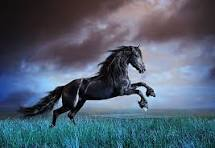

In [ ]:
# Prepare the Image
import cv2
 #load the image
image_path="/content/test.jpeg"
image=cv2.imread(image_path)
image


image 1/1 /content/test.jpeg: 448x640 1 horse, 8.3ms
Speed: 5.4ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


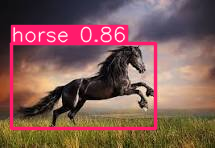

In [ ]:
# Run inference on the image
results = model(image_path)  # Inference

# Show results using the .show() method
results[0].show()  # Access the first result and show the image with detections

##It will display the image with detected objects outlined in bounding boxes


In [ ]:
#Access Detection Results
# Assuming 'results' is a list of YOLOv8 outputs
# Get the first result (for a single image)
result = results[0]

# Access bounding box coordinates, labels, and confidence scores
boxes = result.boxes.xywh  # Bounding boxes in (x, y, width, height) format
labels = result.boxes.cls  # Class labels
confidences = result.boxes.conf  # Confidence scores

# If you want to print the values for each detection:
for i in range(len(boxes)):
    print(f"Box {i}: {boxes[i]}, Label: {labels[i]}, Confidence: {confidences[i]}")


Box 0: tensor([ 83.7122,  86.0257, 144.4007,  85.2332], device='cuda:0'), Label: 17.0, Confidence: 0.862442672252655


**2.How do you load the Faster RCNN model with a ResNet50 backbone and print its architecture ?**

In [ ]:
##To load a Faster R-CNN model with a ResNet50 backbone and print its architecture, you can use the PyTorch library, which provides pre-trained Faster R-CNN models and allows you to specify a custom backbone
pip install torch torchvision


In [ ]:
#Loading the Faster R-CNN model with ResNet50 backbone
import torch
from torchvision import models

#load faster R-CNN with a ResNet50 backbone
model=models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

#print the model architecture
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 177MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

**3.How do you perform inference on an online image using the Faster RCNN model and print the predictions ?**

In [ ]:
#installing required library including PyTorch, torchvision, and PIL (for image processing)
pip install torch torchvision pillow requests


In [ ]:
#Loading  the Pre-trained Faster R-CNN Model:  the pre-trained Faster R-CNN model with a ResNet50 backbone from torchvision
import torch
from torchvision import models,transforms
from PIL import Image
import requests
from io import BytesIO

#load faster r-cnn model with resnet50 backbone
model=models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  #set model to evaluation mode

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

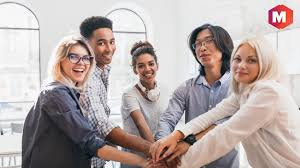

In [ ]:
#Fetching the Online Image: Using the requests library to fetch the online image from a URL
url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTepOf1eC3lhJRPvLefpZkbvj37myX7ivX3Ng&s'
response=requests.get(url)
image=Image.open(BytesIO(response.content))
image

In [ ]:
#Preprocess the Image: Applying necessary transformations to the image, including resizing and normalization, to match the model's expected input format

transform=transforms.Compose([
    transforms.ToTensor(),
])
#Apply transformations
img_tensor=transform(image).unsqueeze(0) #add batch dimension

In [ ]:
#Perform Inference: Runing the model on the preprocessed image and obtain predictions
with torch.no_grad():   #no gradients needed for inference
    prediction=model(img_tensor)
# Extract the bounding boxes, labels, and scores
boxes = prediction[0]['boxes'].numpy()
labels = prediction[0]['labels'].numpy()
scores = prediction[0]['scores'].numpy()


In [ ]:
#print the  predictions:
for i in range(len(boxes)):
  print(f"Box {i}: {boxes[i]}, Label: {labels[i]}, Score: {scores[i]}")

Box 0: [     18.409      34.374      134.25      167.15], Label: 1, Score: 0.99290531873703
Box 1: [     145.19      26.532      248.52      161.25], Label: 1, Score: 0.9927529096603394
Box 2: [     267.27      3.8024      294.88      31.131], Label: 13, Score: 0.9718241095542908
Box 3: [     74.318      22.669      142.98      163.89], Label: 1, Score: 0.9481292963027954
Box 4: [     94.498      42.294      186.88      163.98], Label: 1, Score: 0.9418594241142273
Box 5: [     181.63      35.299      294.19      160.79], Label: 1, Score: 0.8756860494613647
Box 6: [     80.883       16.18      120.89      140.23], Label: 1, Score: 0.8717489242553711
Box 7: [     102.14      65.039      110.35      93.091], Label: 32, Score: 0.7374093532562256
Box 8: [      114.7      43.595      163.52       147.7], Label: 1, Score: 0.6294077634811401
Box 9: [     74.514      90.385      87.305      116.41], Label: 32, Score: 0.3000722825527191
Box 10: [     101.09      70.139      107.62      91.536], 

**4.How do you load an image and perform inference using YOLOv9, then display the detected objects with bounding boxes and class labels?**

In [ ]:
#Installing Required Libraries
pip install ultralytics matplotlib


In [ ]:
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

#load the model
model = YOLO('yolov8n.pt')

In [ ]:
#load the image
# Load an image from file
image = cv2.imread('/content/test.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB


In [ ]:
#performing inference
results = model(image)  # Run inference on the image



0: 448x640 1 horse, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


ValueError: not enough values to unpack (expected 4, got 1)

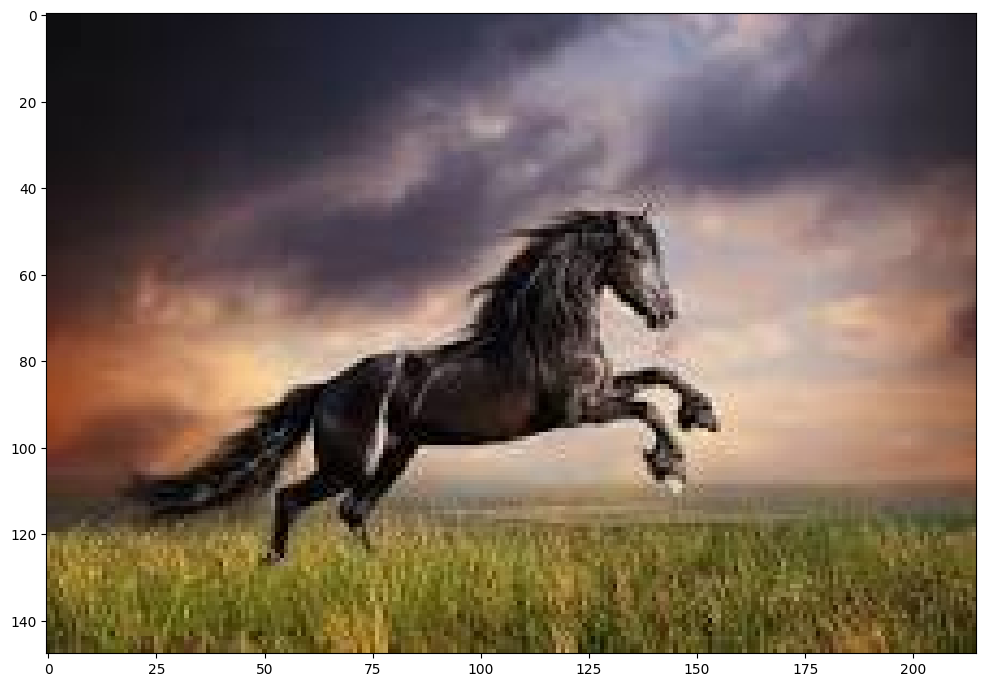

In [ ]:
import matplotlib.pyplot as plt

# Assuming `results` contains the detected objects
boxes = results[0].boxes.cpu().numpy()  # Convert the box coordinates to a NumPy array
confidences = results[0].boxes.conf.cpu().numpy()  # Confidence scores
labels = results[0].names  # Class labels

# Visualize the results
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image_rgb)

# Iterate over the bounding boxes
for i, box in enumerate(boxes):
    # Extract x_center, y_center, width, height from the box coordinates
    x_center, y_center, width, height = box[:4]  # Get first 4 elements: [x_center, y_center, width, height]

    # Calculate x1, y1, x2, y2 from the center and dimensions
    x1 = x_center - width / 2
    y1 = y_center - height / 2
    x2 = x_center + width / 2
    y2 = y_center + height / 2

    # Draw the bounding box on the image
    ax.add_patch(plt.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='red', facecolor='none'))
    ax.text(x1, y1, f'{labels[int(box[4])]} {confidences[i]:.2f}', color='red', fontsize=12, weight='bold')

plt.show()


**5.How do you display bounding boxes for the detected objects in an image using Faster RCNN ?**

Ans:

To display bounding boxes for detected objects in an image using **Faster R-CNN**:

### Step-by-Step Process:
1. **Load Pre-trained Faster R-CNN Model:**
   You can use a pre-trained Faster R-CNN model from libraries like **TorchVision**. This model can be fine-tuned for custom datasets, but for simplicity, you can use the pre-trained version.

2. **Prepare the Image:**
   The image should be loaded, transformed to a tensor, and normalized. Typically, this involves resizing the image, converting it to a tensor, and normalizing pixel values.

3. **Perform Inference:**
   The image tensor is passed to the Faster R-CNN model, and the output will include bounding boxes, labels, and confidence scores.

4. **Visualize the Bounding Boxes:**
   After performing inference, the bounding boxes (along with labels and confidence scores) can be extracted and displayed on the image using **Matplotlib**.



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


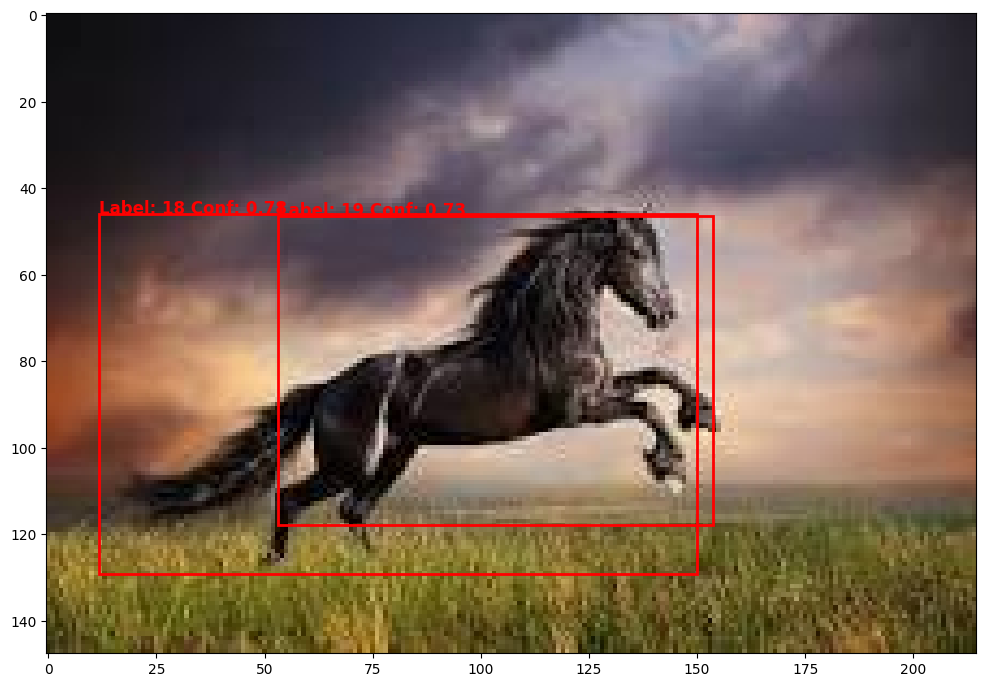

In [ ]:
import torch
import matplotlib.pyplot as plt
from torchvision import models, transforms
from PIL import Image

# Load a pre-trained Faster R-CNN model with a ResNet50 backbone
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Load and preprocess the image
image_path = "/content/test.jpeg"
image = Image.open(image_path)

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
])

#apply the transformations to the image
image_tensor=transform(image).unsqueeze(0)  #add batch dimension

#perform infernce
with torch.no_grad():  #disable gradient calculation for infernce
    predictions=model(image_tensor)
# Extract the results
boxes = predictions[0]['boxes']  # Bounding boxes
labels = predictions[0]['labels']  # Class labels
scores = predictions[0]['scores']  # Confidence scores

# Visualize the results
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

# Loop through each detected object
for i, box in enumerate(boxes):
    if scores[i] > 0.5:  # Set a confidence threshold
        x1, y1, x2, y2 = box
        ax.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                   linewidth=2, edgecolor='red', facecolor='none'))
        ax.text(x1, y1, f"Label: {labels[i]} Conf: {scores[i]:.2f}",
                color='red', fontsize=12, weight='bold')

plt.show()

**6.How do you perform inference on a local image using Faster RCNN ?**

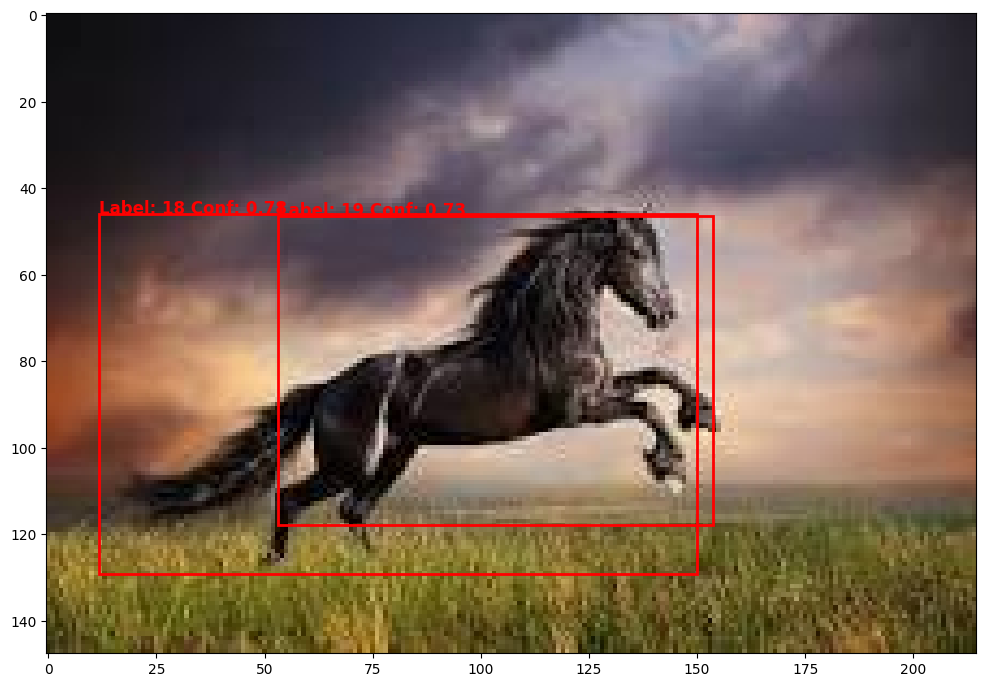

In [ ]:
import torch
import matplotlib.pyplot as plt
from torchvision import models, transforms
from PIL import Image

# Step 1: Load the pre-trained Faster R-CNN model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Step 2: Load and preprocess the image
image_path = "/content/test.jpeg"
image = Image.open(image_path)

# Step 3: Define the transformations to convert the image into a tensor
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a tensor
])

# Apply transformations to the image
image_tensor = transform(image).unsqueeze(0)  # Add a batch dimension

# Step 4: Perform inference (no gradients needed during inference)
with torch.no_grad():
    predictions = model(image_tensor)

# Step 5: Extract the results (boxes, labels, and confidence scores)
boxes = predictions[0]['boxes']  # Bounding boxes
labels = predictions[0]['labels']  # Class labels
scores = predictions[0]['scores']  # Confidence scores

# Step 6: Visualize the results (Bounding boxes on the image)
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

# Loop through each detected object
for i, box in enumerate(boxes):
    if scores[i] > 0.5:  # Use a confidence threshold (e.g., 0.5)
        x1, y1, x2, y2 = box
        ax.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                   linewidth=2, edgecolor='red', facecolor='none'))
        ax.text(x1, y1, f"Label: {labels[i]} Conf: {scores[i]:.2f}",
                color='red', fontsize=12, weight='bold')

plt.show()


**7.How can you change the confidence threshold for YOLO object detection and filter out low-confidence
predictions ?**

Ans:
To change the confidence threshold in YOLO (You Only Look Once) object detection and filter out low-confidence predictions, you need to adjust the threshold when processing the model's predictions. YOLO provides confidence scores for each detected object, which indicate the likelihood that an object belongs to a specific class. By setting a confidence threshold

### Steps to Adjust Confidence Threshold in YOLO (YOLOv5 or YOLOv7):

1. **Perform Inference with YOLO:**
   When running inference with YOLO, the model returns predictions that include bounding boxes, confidence scores, and class labels. The predictions typically have a format like:
   - `[x_min, y_min, x_max, y_max, confidence, class_probabilities...]`

2. **Set the Confidence Threshold:**
   You can filter out predictions based on the confidence score. For example, if you want to ignore detections with a confidence lower than 0.5, you would set a threshold of 0.5.

### Why Adjust Confidence Threshold?
- **False Positives:** Lowering the threshold allows the model to detect more objects, but it may increase the number of false positives (incorrectly identified objects).
- **Precision vs. Recall:** A higher threshold increases precision (fewer false positives) but reduces recall (fewer objects detected). Balancing the threshold based on your needs can improve detection quality.



In [ ]:
import torch
from matplotlib import pyplot as plt
from PIL import Image

# Load YOLOv5 model (v6.2)
model = torch.hub.load('ultralytics/yolov5:v6.2', 'yolov5s')

# Load an image
img = Image.open('/content/test.jpeg')

# Perform inference
results = model(img)

# Set confidence threshold (e.g., 0.5)
confidence_threshold = 0.5

# Extract bounding boxes and confidences
boxes = results.xywh[0].cpu().numpy()  # xywh format bounding boxes
confidences = boxes[:, 4]  # Confidence scores

# Filter detections based on confidence threshold
high_conf_boxes = boxes[confidences > confidence_threshold]

# Visualize the results
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(img)

for box in high_conf_boxes:
    x1, y1, width, height = box[:4]
    ax.add_patch(plt.Rectangle((x1 - width / 2, y1 - height / 2), width, height,
                               linewidth=2, edgecolor='red', facecolor='none'))
    ax.text(x1, y1, f'{results.names[int(box[5])]} {box[4]:.2f}', color='red', fontsize=12, weight='bold')

plt.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_v6.2
requirements: protobuf<=3.20.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_v6.2/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2024-12-15 Python-3.10.12 torch-2.5.1+cu121 CPU

/root/.cache/torch/hub/ultralytics_yolov5_v6.2/models/experimental.py:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

**8.How do you plot the training and validation loss curves for model evaluation ?**


0: 448x640 1 horse, 162.1ms
Speed: 3.6ms preprocess, 162.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


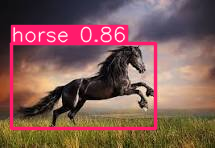

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

100%|██████████| 6.66M/6.66M [00:00<00:00, 17.3MB/s]
Unzipping /content/yolov5/datasets/coco128.zip to /content/yolov5/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 3245.01file/s]

Dataset download success ✅ (2.5s), saved to /content/yolov5/datasets



100%|██████████| 755k/755k [00:00<00:00, 3.41MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/yolov5/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 1552.41it/s]

train: New cache created: /content/yolov5/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/yolov5/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.942      5.323      2.499         73        640: 100%|██████████| 8/8 [02:06<00:00, 15.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:48<00:00, 12.18s/it]

                   all        128        929      0.029    0.00189    0.00064   0.000196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      2.905      5.313       2.53         97        640: 100%|██████████| 8/8 [01:55<00:00, 14.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:47<00:00, 11.91s/it]

                   all        128        929     0.0156    0.00113    0.00032   8.64e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G       2.99      5.284      2.559        109        640: 100%|██████████| 8/8 [01:54<00:00, 14.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:48<00:00, 12.03s/it]

                   all        128        929     0.0141    0.00582    0.00044   0.000122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      2.812       5.24      2.467         99        640: 100%|██████████| 8/8 [01:54<00:00, 14.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:45<00:00, 11.41s/it]

                   all        128        929   4.09e-05     0.0061   0.000506   0.000159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      2.913      5.277      2.504         52        640: 100%|██████████| 8/8 [01:50<00:00, 13.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:47<00:00, 11.84s/it]

                   all        128        929     0.0142    0.00466    0.00049   0.000176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      2.732      5.194      2.387         97        640: 100%|██████████| 8/8 [01:53<00:00, 14.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:49<00:00, 12.26s/it]

                   all        128        929     0.0284    0.00421   0.000671   0.000254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      2.767      5.156      2.433        190        640: 100%|██████████| 8/8 [01:54<00:00, 14.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:18<00:18,  9.45s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:48<00:00, 12.09s/it]

                   all        128        929      0.015    0.00305   0.000778    0.00032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      2.736      5.077      2.422        143        640: 100%|██████████| 8/8 [01:53<00:00, 14.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:48<00:00, 12.10s/it]

                   all        128        929   0.000163    0.00813    0.00102   0.000391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      2.784      5.077      2.404        104        640: 100%|██████████| 8/8 [01:51<00:00, 13.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:50<00:00, 12.73s/it]

                   all        128        929   0.000209    0.00976    0.00134   0.000483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      2.773      5.143      2.413        112        640: 100%|██████████| 8/8 [01:51<00:00, 13.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:50<00:00, 12.73s/it]

                   all        128        929   0.000319     0.0122    0.00166   0.000573



10 epochs completed in 0.457 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:29<00:10, 10.45s/it]

In [ ]:
from ultralytics import YOLO  # Import YOLO class
import matplotlib.pyplot as plt
from PIL import Image

# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # Load YOLOv8 Nano model

# Load an image for inference
image_path = '/content/test.jpeg'  # Provide the correct path to your image
image = Image.open(image_path)

# Perform inference on the image
results = model(image)

# Display results (bounding boxes and labels)
results[0].show()

# Training and Validation Loss Curves (if training was performed)
# Train a model to generate a history object for plotting
results = model.train(data='coco128.yaml', epochs=10, imgsz=640)  # Train on sample COCO dataset

# Extract training and validation losses
metrics = results.metrics  # Metrics from the training process

# Plot loss curves
plt.figure(figsize=(10, 5))
plt.plot(metrics['train/loss'], label='Training Loss')
plt.plot(metrics['val/loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Curves')
plt.show()


**9.How do you perform inference on multiple images from a local folder using Faster RCNN and display the bounding boxes for each ?**

In [16]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import os
import zipfile
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Extract the zip file
zip_path = "/content/imgzip.zip"
extract_folder = "/content/images"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Load the pretrained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(weights="DEFAULT")
model.eval()  # Set to evaluation mode

# Define functions for preprocessing and visualization
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Ensure RGB format
    return F.to_tensor(image)

def visualize_image(image_path, predictions, threshold=0.5):
    image = Image.open(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()

    # Draw bounding boxes
    for box, score in zip(predictions['boxes'], predictions['scores']):
        if score >= threshold:  # Only display boxes above threshold
            x1, y1, x2, y2 = box
            width, height = x2 - x1, y2 - y1
            rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y1 - 5, f"{score:.2f}", color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    plt.axis('off')
    plt.show()

# Perform inference on multiple images
folder_path = extract_folder
image_paths = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith(('.jpg', '.png', '.jpeg'))]

for image_path in image_paths:
    # Preprocess image
    image_tensor = preprocess_image(image_path).unsqueeze(0)  # Add batch dimension

    # Run inference
    with torch.no_grad():
        predictions = model(image_tensor)[0]

    # Visualize results
    visualize_image(image_path, predictions)




**10.How do you visualize the confidence scores alongside the bounding boxes for detected objects using Faster RCNN ?**

In [19]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load the pretrained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(weights="DEFAULT")
model.eval()  # Set to evaluation mode

# Define functions for preprocessing and visualization
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Ensure RGB format
    return F.to_tensor(image)

def visualize_predictions(image_path, predictions, threshold=0.5):
    image = Image.open(image_path)
    plt.figure(figsize=(12, 12))
    plt.imshow(image)
    ax = plt.gca()

    # Draw bounding boxes and confidence scores
    for box, score in zip(predictions['boxes'], predictions['scores']):
        if score >= threshold:  # Only display boxes above threshold
            x1, y1, x2, y2 = box
            width, height = x2 - x1, y2 - y1
            rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y1 - 5, f"{score:.2f}", color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    plt.axis('off')
    plt.show()

# Example Image Path
image_path = "/content/images1.jpeg"  # Replace with your local image path

# Preprocess the image
image_tensor = preprocess_image(image_path).unsqueeze(0)  # Add batch dimension

# Run inference
with torch.no_grad():
    predictions = model(image_tensor)[0]

# Visualize predictions
visualize_predictions(image_path, predictions, threshold=0.5)


**11.How can you save the inference results (with bounding boxes) as a new image after performing detection using YOLO ?**

In [20]:
import cv2
import torch
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO('yolov8n.pt')

# Load image for inference
image_path = "/content/img2.jpeg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB as required by YOLO

# Perform inference
results = model(image_rgb)

# Extract detections
detections = results[0]  # Get the first image's detections
boxes = detections.boxes.xyxy.cpu().numpy()  # Bounding boxes (x1, y1, x2, y2)
confidences = detections.boxes.conf.cpu().numpy()  # Confidence scores
labels = detections.boxes.cls.cpu().numpy()  # Class labels

# Annotate the image
for box, conf, label in zip(boxes, confidences, labels):
    x1, y1, x2, y2 = map(int, box)
    class_name = model.names[int(label)]  # Get class name
    color = (0, 255, 0)  # Green color for bounding boxes

    # Draw bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

    # Put label and confidence score
    label_text = f"{class_name} {conf:.2f}"
    cv2.putText(image, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Save the annotated image
output_path = "output_image.jpg"
cv2.imwrite(output_path, image)
print(f"Annotated image saved at {output_path}")



0: 384x640 1 teddy bear, 152.2ms
Speed: 4.3ms preprocess, 152.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Annotated image saved at output_image.jpg
